<div style='text-align:center;'>
     <img style='width:500px' src='./logo_fpt.png' height='90px'>
<h5><u>Master Big Data et Intelligence Artificielle</u><hr>
        <h1 style='color:blue;'><b>DETECTION DES MALADIES DES <span style='color:green;'>PLANTES</h1><hr>
    <p style='text-align:center;'> réalisé par: </p>
        <small><b style='text-align:center;'>BENCHEIKH Mohamed | HAMOUICHOU Khawla</b>

<h3 style='color:blue;'>Contenu

<a href='#imp'>Introduction<br>
<a href='#imp'>Objectif<br>
<a href='#imp'>Méthodologie<br>
    <a href='#test'>Cas d'étude</b><br>
    <li><a href='#im1'>Image 1: cas de la Mouche Mineuse
    <li><a href='#im2'>Image 2: cas de Thrips
    <li><a href='#im3'>Image 3: cas de Tuta Absoluta<br>
<a href='#ext'>Extraction des primitives
    <li><a href='#cl'>La couleur
    <li><a href='#tx'>La texture
    <li><a href='#fr'>La forme<br>
<a href='#imp'>Conclusion<br>

<h3 style='color:blue'><b id='test'>Introduction

Le secteur de l'agriculture joue un rôle essentiel dans la sécurité alimentaire mondiale. Cependant, les défis liés aux maladies des plantes représentent une menace significative pour la productivité et la qualité des cultures. Afin de relever ce défi, notre projet vise à développer un système de détection avancé basé sur le traitement d'images des feuilles, en mettant l'accent sur la segmentation, le clustering et l'extraction des caractéristiques.

<h3 style='color:blue'><b id='test'>Objectif

A l'aide de l'IA, nous avons conçu une application de reconnaissance des problèmes qui peuvent toucher les plantes.
Cette application utilise l'aspect visuel pour inspecter la santé des plantes.<br>
Notre projet s'agit d'un  système de détection automatique des problèmes qui peuvent toucher les plantes.
Le but est de proposer des outils performant à l'aide des techniques du traitement d'image et de l'Intelligence artificielle, afin d'aider  les agriculteurs dans le processus de diagnostic des maladies des plantes.

<h3 style='color:blue'><b id='test'>Méthodologie

<b id='b'>Importation des bibliothèques:

In [1]:
import cv2
import numpy as np
import pandas as pd
import scipy.stats as st
import matplotlib.pyplot as plt
import skimage.feature as skf

<b id='imp'>Implémentation des fonctions qu'on va utiliser:

In [2]:
## Une fonction qui retourne toutes les cordonnées d'une image
def getCords(img):
    l,c,_ = img.shape
    x,y = [],[]
    for i in range(l):
        for j in range(c):
            x.append(i) ; y.append(j)
    return x,y

In [3]:
## Une fonction qui va représenter l'image sous forme d'un dataframe
def imageToDataFrame(img):
    pxl = img.reshape((-1,3))
    pxl = np.float32(pxl)
    imdf = pd.DataFrame(pxl,columns=['R','G','B'])
    x,y = getCords(img)
    imdf['X'] = x
    imdf['Y'] = y
    return imdf

In [4]:
def getClusters(imdf,k):
    pxl = np.array(imdf.loc[:,'R':'B'].values)
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.85)
    retval, labels, centers = cv2.kmeans(pxl,k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
    centers = np.uint8(centers)
    result = centers[labels.flatten()]
    clusters = []
    h,w = imdf['X'].max()+1 , imdf['Y'].max()+1
    for i in range(k):
        clusters.append(imdf[labels==i])
    imgRes = result.reshape((h,w,3))
    return clusters,centers,labels,imgRes

La fonction <b>getClusters</b> utilise la méthode de clustering qui s'appelle <span style='color:red;'>KMeans</span> pour segmenter l'image
en un ensemble de segments (clusters).<br>
Elle prend comme paramètre: <br>
<li><i>imdf<i>: le dataframe de l'image</li>
<li><i>k<i>: le nombre de clusters qu'on souhaite génerer.</li>
Elle renvoit:<br>
<li>les clusters extraits</li>
<li>les centres de chaque cluster</li>
<li>les labels des clusters (0,1,2..)</li>
<li>L'image résultante après la segmentation</li>

In [52]:
def getClusterImage(img,cluster):
    img_res = np.zeros((img.shape),dtype='uint8')
    for i in range(cluster.shape[0]):
        x,y = int(cluster.iloc[i]['X']),int(cluster.iloc[i]['Y'])
        r,g,b = cluster.iloc[i]['R'],cluster.iloc[i]['G'],cluster.iloc[i]['B'] 
        img_res[x,y] = [r,g,b]
    return img_res

Cette fonction permet d'obtenir l'image de chaque cluster

<h3 style='color:blue'><b id='test'>Approche

On va tester notre approche sur un ensemble d'images de plantes qui marque certains indices de maladies sur ces feuilles:
On va étudier particulièrement 3 types de lésions:
- Mouche mineuses<br>
- Thrips<br>
- Tuta Absoluta<br>

<h4 id='im1' style='color:green;'><b>Cas 1 : La mouche mineuse

Le premier cas qu'on va traiter c'est le cas des plantes infectées par la <b>Mouche Mineuse</b>.

In [5]:
from ipywidgets import FileUpload
from IPython.display import display

In [36]:
file = FileUpload()
display(file)

FileUpload(value=(), description='Upload', multiple=True)

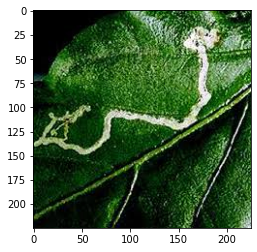

In [44]:
filename = file.value[0]['name']
img_test = cv2.imread('./images/Mouche mineuse/'+filename)
im1 = cv2.cvtColor(img_test,cv2.COLOR_BGR2RGB)
plt.imshow(im1)

In [45]:
im1.shape

(225, 225, 3)

<b>Pré-traitement de l'image:

On applique un filtre médian afin de réduire le bruit.

Text(0.5, 1.0, 'Image filtrée')

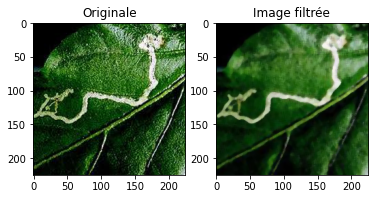

In [46]:
im1_fltr = cv2.medianBlur(im1,5)
_,(orig,filt) = plt.subplots(ncols=2)
orig.imshow(im1)
orig.set_title('Originale')
filt.imshow(im1_fltr)
filt.set_title('Image filtrée')

On représente notre image sous forme de DataFrame avec la bibliothèque <i>'pandas'</i> pour manipuler les données de l'image par la suite.<br>
Les lignes représentent les pixels de l'image.<br>
Les colonnes représentent les valeurs de chaque canal: R,G,B et les cordonnées x,y de chaque pixel.

In [47]:
im1_df = imageToDataFrame(im1_fltr)

In [10]:
len(im1_df.loc[:,'R':'B'].values)

238150

In [48]:
im1_clu , im1_cen , im1_lab , im1_res = getClusters(im1_df,3)

In [49]:
im1_cen

array([[ 57, 109,  39],
       [161, 184, 148],
       [  8,  35,   7]], dtype=uint8)

In [50]:
im1_df['cluster'] = im1_lab

In [53]:
im1_cluster0 = getClusterImage(im1_fltr,im1_clu[0])

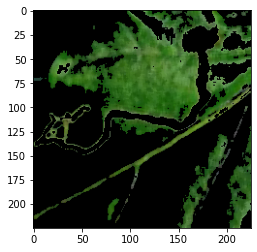

In [54]:
plt.imshow(im1_cluster0)

In [55]:
im1_cluster1 = getClusterImage(im1_fltr,im1_clu[1])

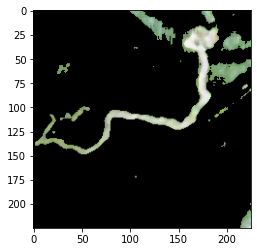

In [56]:
plt.imshow(im1_cluster1)

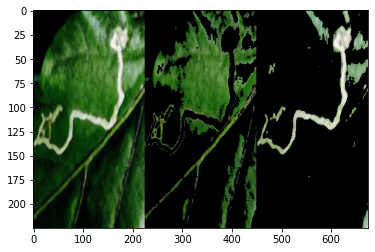

In [57]:
res = cv2.hconcat([im1_fltr,im1_cluster0,im1_cluster1])
plt.imshow(res,aspect='auto')

In [59]:
im1_fltr.shape, im1_cluster1.shape

((225, 225, 3), (225, 225, 3))

In [61]:
contours, _= cv2.findContours(im1_cluster1.astype(np.uint8),cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)

error: OpenCV(4.5.5) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\contours.cpp:197: error: (-210:Unsupported format or combination of formats) [Start]FindContours supports only CV_8UC1 images when mode != CV_RETR_FLOODFILL otherwise supports CV_32SC1 images only in function 'cvStartFindContours_Impl'


<h4><b id='im2' style='color:green;'>Cas 2 : Thrips 

La 2<sup>ème</sup> image s'agit d'une plante infectée par Thrips.

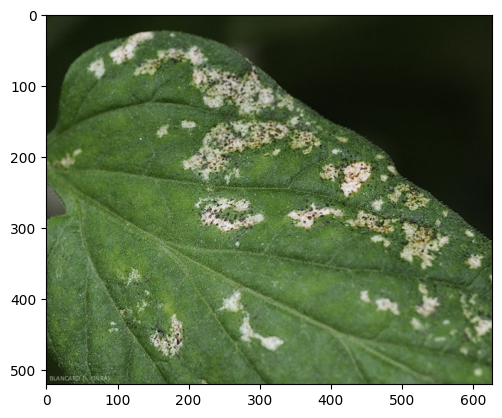

In [68]:
im2 = cv2.imread('./images/Thrips/67.jpg')
im2 = cv2.cvtColor(im2,cv2.COLOR_BGR2RGB)
plt.imshow(im2)

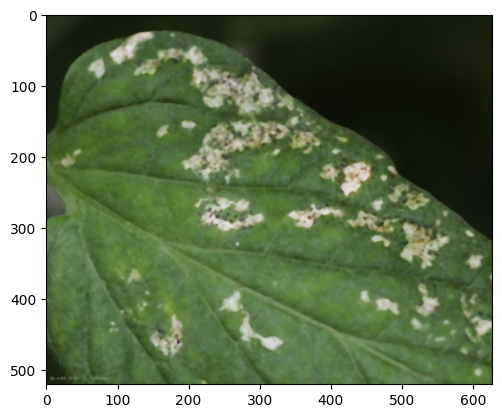

In [69]:
im2_fltr = cv2.medianBlur(im2,5)
plt.imshow(im2_fltr)

In [70]:
im2.shape

(520, 628, 3)

In [71]:
im2_df = imageToDataFrame(im2_fltr)

In [72]:
im2_clu,im2_cen,im2_lab,im2_res = getClusters(im2_df,k=3)

In [73]:
im2_df['cluster'] = im2_lab

In [74]:
im2_cen

array([[167, 172, 143],
       [ 84, 112,  62],
       [ 20,  27,  11]], dtype=uint8)

In [77]:
im2_cluster0 = getClusterImage(im2_fltr,im2_clu[1])

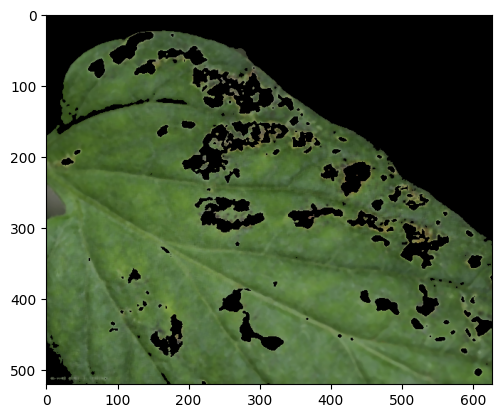

In [78]:
plt.imshow(im2_cluster0)

In [79]:
im2_cluster1 = getClusterImage(im2_fltr,im2_clu[0])

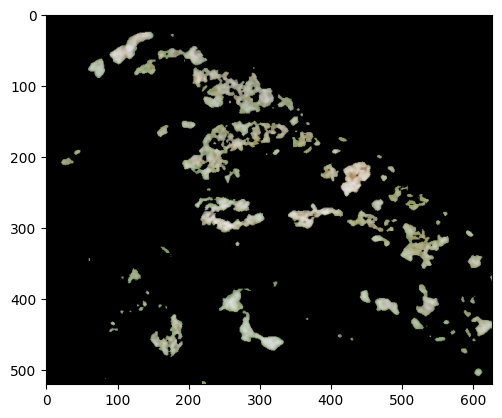

In [80]:
plt.imshow(im2_cluster1)

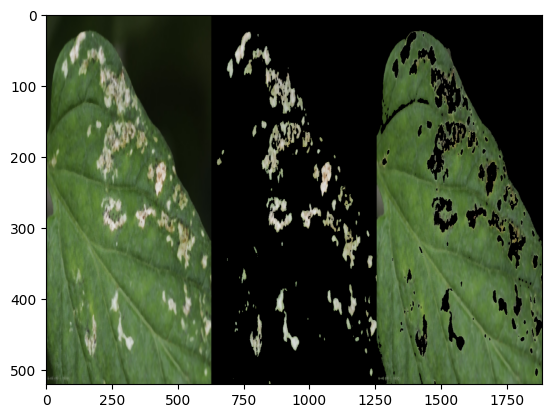

In [84]:
im2_tot = cv2.hconcat([im2_fltr,im2_cluster1,im2_cluster0])
plt.imshow(im2_tot,aspect='auto')

<b id='im3' style='color:green'><u>Image 3 

L'image 3 illustre un cas d'une plante infectée par l'insecte:<b>Tuta Absoluta</b>.

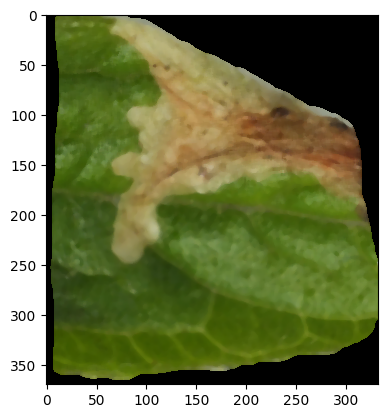

In [31]:
im3 = cv2.imread('./images/Tuta absoluta/3.png')
im3 = cv2.cvtColor(im3,cv2.COLOR_BGR2RGB)
im3_fltr = cv2.medianBlur(im3,5)
plt.imshow(im3_fltr)

In [32]:
im3_fltr.shape

(370, 332, 3)

In [33]:
im3_df = imageToDataFrame(im3_fltr)

In [34]:
im3_clu, im3_cen , im3_lab , im3_res = getClusters(im3_df,k=3)

In [35]:
im3_cen

array([[154, 141,  82],
       [ 80, 101,  25],
       [  0,   0,   0]], dtype=uint8)

In [36]:
im3_part_intact = getClusterImage(im3_fltr,im3_clu[2])

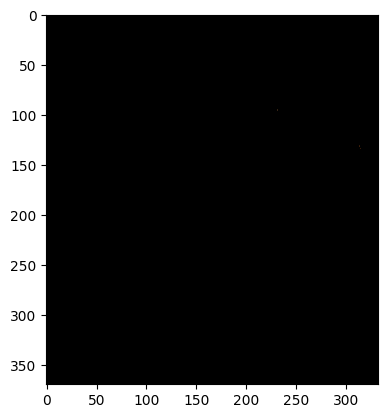

In [37]:
plt.imshow(im3_part_intact)

In [47]:
im3_part_infect = getClusterImage(im3_fltr,im3_clu[1])

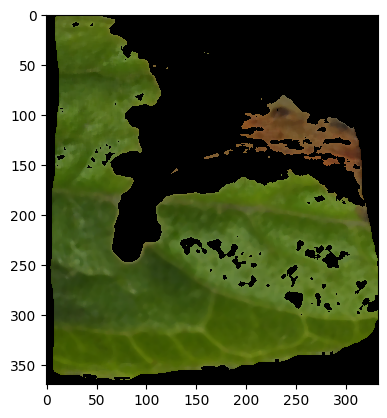

In [48]:
plt.imshow(im3_part_infect)

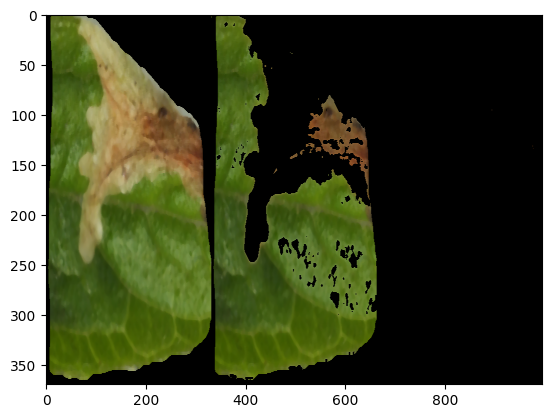

In [49]:
im2_tot = cv2.hconcat([im3_fltr,im3_part_infect,im3_part_intact])
plt.imshow(im2_tot,aspect='auto')

<h3 id='ext' style='color:blue;'><b>Extraction des primitives

<b id='cl'>1- Les primitives de la couleur:

In [50]:
## Convert image from RGB mode to HSV :
im1_hsv = cv2.cvtColor(im1_fltr,cv2.COLOR_RGB2HSV)

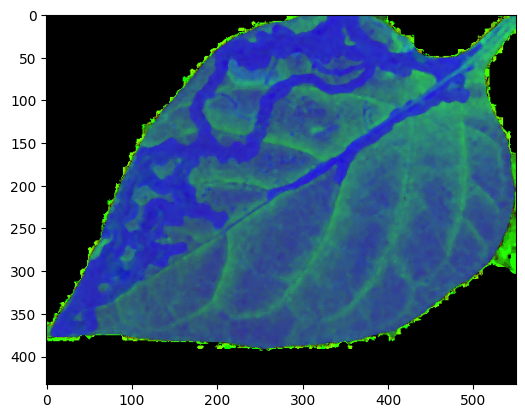

In [51]:
plt.imshow(im1_hsv)

In [52]:
### RGB Mode
im1_R = im1_fltr[:,:,0]
im1_G = im1_fltr[:,:,1]
im1_B = im1_fltr[:,:,2]
### HSV Mode
im1_H = im1_hsv[:,:,0]
im1_S = im1_hsv[:,:,1]
im1_V = im1_hsv[:,:,2]

<li style='color:red;'>Mean:

In [53]:
red_mean = np.mean(im1_R)
green_mean = np.mean(im1_G)
blue_mean = np.mean(im1_B)
hue_mean = np.mean(im1_H)
sat_mean = np.mean(im1_S)
v_mean = np.mean(im1_V)

In [54]:
red_mean,green_mean,blue_mean

(77.0341381482259, 91.48987612849045, 60.75269787948772)

In [158]:
hue_mean,sat_mean,v_mean

(29.902326264959058, 63.025748477850094, 91.52444677724124)

<li style='color:red;'>Standard Deviation:

In [61]:
red_std = np.std(im1_R)
green_std = np.std(im1_G)
blue_std = np.std(im1_B)
hue_std = np.std(im1_H)
sat_std = np.std(im1_S)
v_std = np.std(im1_V)

In [ ]:
red_std,green_std,blue_std

(63.7322448697712, 71.90544894831203, 53.58067226765097)

In [62]:
hue_std,sat_std,v_std

(22.630925816733228, 55.03688287152419, 71.90207383953864)

<li style='color:red;'>Skewness:

In [63]:
red_skew = st.skew(im1_R.reshape(-1,))
green_skew = st.skew(im1_G.reshape(-1,))
blue_skew = st.skew(im1_B.reshape(-1,))
hue_skew = st.skew(im1_H.reshape(-1,))
sat_skew = st.skew(im1_S.reshape(-1,))
v_skew = st.skew(im1_V.reshape(-1,))

In [ ]:
red_skew,green_skew,blue_skew

(0.021567579025407808, -0.2726806604802281, 0.3053620409707923)

In [64]:
hue_skew,sat_skew,v_skew

(-0.07082714723945017, 0.522421673391135, -0.27240485401135667)

<b id='tx'>2- Les primitives de la texture:

Pour extraire les primitive de texture d'une image, on va utiliser la méthode GLCM.<br>
Il faut d'abord convertir l'image en mode grayscale.

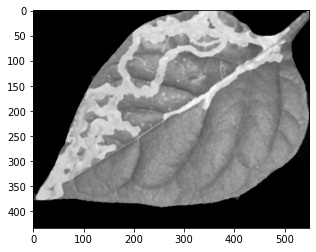

In [56]:
im1_gray = cv2.cvtColor(im1_fltr,cv2.COLOR_RGB2GRAY)
plt.imshow(im1_gray,cmap='gray')

On calcule la matrice de co-occurence.

In [ ]:
mx = im1_gray.max();mx

221

In [ ]:
im1_glcm = skf.graycomatrix(im1_gray,[1],angles=[0],levels=mx+1,normed=1)

In [ ]:
energy = skf.graycoprops(im1_glcm,prop='energy')
contrast = skf.graycoprops(im1_glcm,prop='contrast')
correlation = skf.graycoprops(im1_glcm,prop='correlation')
entropy = skf.graycoprops(im1_glcm,prop='ASM')
homogeneity = skf.graycoprops(im1_glcm,prop='homogeneity')

In [ ]:
print(f"""Energy:{round(energy[0][0],2)}\nContrast:{round(contrast[0][0],2)}
    \nCorrelation:{round(correlation[0][0],2)}\nEntropy:{round(entropy[0][0],2)}
    \nHomogeneity:{round(homogeneity[0][0],2)}""")

Energy:0.34
Contrast:48.5
    
Correlation:0.99
Entropy:0.11
    
Homogeneity:0.6


<b id='fr'>3- Les primitives de la forme:

<li style='color:red;'>L'aire:

On calcule l'aire de la tâche de la lésion.

In [47]:
aire = im1_clu[0].shape[0]

In [48]:
print('Laire de la lésion dans l\'image 1 est:',aire)

Laire de la lésion dans l'image 1 est: 35643


<li style='color:red;'>Périmètre:

On doit d'abord convertir l'image de la tâche de la l'ésion en mode grayscale.

In [18]:
cl0_gray = cv2.cvtColor(im1_cluster0,cv2.COLOR_RGB2GRAY)

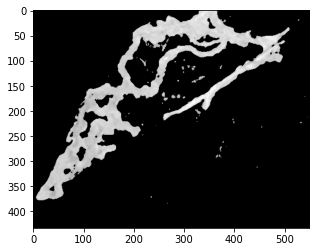

In [20]:
plt.imshow(cl0_gray,cmap='gray')

In [162]:
cont,hier = cv2.findContours(cl0_gray,cv2.RETR_TREE,cv2.CHAIN_APPROX_NONE)

In [163]:
cont.__len__()

82

In [164]:
area = cv2.contourArea(cont[0])

In [165]:
per = cv2.arcLength(cont[1],True)

In [166]:
per

7.414213538169861

<li style='color:red;'>Circularité:

In [65]:
circ = (4*np.pi*aire)/(per**2)

In [66]:
circ

8148.054673941203

<li style='color:red;'>Complexité:

In [51]:
comp = per**2/aire

In [52]:
comp

0.0015422540860640587

<h3 style='color:blue'><b id='test'>Conclusion

L'approche que nous avons mise en œuvre nous a aidés à segmenter les images en distinguant la partie portant la lésion de la partie intacte. Ensuite, nous avons calculé les primitives caractérisant l'image. Ces primitives serviront de paramètres dans la phase de classification afin de reconnaître le type d'infection de chaque plante.